## Análise exploratória de dados da FIFA (2019)
O arquivo com os respectivos dados pode ser encontrado em https://www.kaggle.com/datasets/winterbreeze/fifa19eda/code.

Inicialmente, será feita um tratamento dos dados nulos e, após isso, partir-se-á para a análise abaixo:
### Análises feitas dos dados
- Qual a influência de *Overall* e *Potential* sobre *Value*?
- Qual a influência de *Club* sobre *Internatinal Reputation*?
- Qual a influência de *Internatinal Reputation* sobre *Value*?
- Qualis os peso e altura médios entre os jogadores?
- Qual a idade média entre os jogadores?
- Qual a média do *Value* dos jogadores? E por clube (*Club*)?
- Análise percentual de *Preferred Foot* entre os jogadores;
- Análise quantitativa de ano *Joined* entre os jogadores.

In [166]:
import pandas as pd

In [167]:
df = pd.read_csv('fifa_eda.csv')
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Skill Moves', 'Position', 'Joined', 'Contract Valid Until', 'Height',
       'Weight', 'Release Clause'],
      dtype='object')

In [168]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [169]:
# deletando a coluna 'ID', porque ela não convém a nenhuma análise
df = df.drop('ID', axis=1)
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18207 non-null  object 
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      17966 non-null  object 
 6   Value                     17955 non-null  float64
 7   Wage                      18207 non-null  float64
 8   Preferred Foot            18207 non-null  object 
 9   International Reputation  18159 non-null  float64
 10  Skill Moves               18159 non-null  float64
 11  Position                  18207 non-null  object 
 12  Joined                    18207 non-null  int64  
 13  Contract Valid Until      17918 non-null  object 
 14  Height

## Limpeza e tratamento de dados
Podemos observar que há alguns dados faltantes. Precisamos, portanto, manipulá-los.

In [171]:
df.isna().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                        241
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [172]:
# análise da coluna 'Club'
# nessa coluna, iremos criar uma nova categoria única, chamada 'sem clube/clube desconhecido' e adicionaremos ela nos valores nan
len(list(df.Club.unique()))

652

In [173]:
df.loc[df['Club'].isna()]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
452,L. Paredes,24,Argentina,80,85,NaN,NaN,0.0,Right,2.0,4.0,CM,2016,NaN,5.916667,165.0,4585.060806
538,A. Granqvist,33,Sweden,80,80,NaN,NaN,0.0,Right,2.0,2.0,LCB,2016,NaN,6.333333,185.0,4585.060806
568,A. Lunev,26,Russia,79,81,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaN,6.166667,176.0,4585.060806
677,I. Smolnikov,29,Russia,79,79,NaN,NaN,0.0,Right,2.0,3.0,RB,2016,NaN,5.833333,154.0,4585.060806
874,A. Dzyuba,29,Russia,78,78,NaN,NaN,0.0,Right,2.0,3.0,ST,2016,NaN,6.416667,201.0,4585.060806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,V. Kaith,21,India,55,64,NaN,NaN,0.0,Right,1.0,1.0,GK,2016,NaN,6.166667,176.0,4585.060806
17215,K. Taimi,26,Finland,55,57,NaN,NaN,0.0,Right,1.0,2.0,RB,2016,NaN,6.333333,187.0,4585.060806
17339,S. Passi,23,India,54,63,NaN,NaN,0.0,Right,1.0,2.0,RM,2016,NaN,5.750000,143.0,4585.060806
17436,D. Lalhlimpuia,20,India,54,67,NaN,NaN,0.0,Right,1.0,2.0,GK,2016,NaN,6.000000,168.0,4585.060806


In [174]:
df['Club'].fillna('without club/unknowed club', inplace=True)

In [175]:
df.isna().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                       252
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [176]:
# preenchendo os valores de 'Value' com zero. Como eles não estão definidos, é o mais lógico a se fazer
df['Value'].fillna(0, inplace=True)
df.isna().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                         0
Wage                          0
Preferred Foot                0
International Reputation     48
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [177]:
# agora, vamos tratar dos dados nulos em International Reputation
# vamos verificar qual é o 'Overall' minimo para cada um dos valores únicos de 'International Reputation'. CCom isso, se o
# jogador com 'International Reputation' nulo tiver um 'Overall' maior que esse valor e o mínimo do 'Overall' do 'International Reputation' superior,
# substituiremos esse 'International Reputation'

df.groupby('International Reputation')['Overall'].min()

International Reputation
1.0    46
2.0    54
3.0    68
4.0    80
5.0    85
Name: Overall, dtype: int64

In [178]:
# podemos observar que o overall de todos esses jogadores é 62. Logo, podemos subsituir todos os 'International Reputation' nulos por 3.0
# variável x utilizada só para caso de análise
x = df.loc[df['International Reputation'].isna()]

In [179]:
x['Overall'].unique()

array([62])

In [180]:
df['International Reputation'].fillna(3.0, inplace=True)

In [181]:
df.isna().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                         0
Wage                          0
Preferred Foot                0
International Reputation      0
Skill Moves                  48
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [182]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [183]:
# 'Skill Moves': como é difícil definir um critério para atribuir as habilidades de movimento com esses dados, substituiremos
# os dados nulos com a média geral não-nula
media = int(df['Skill Moves'].mean(numeric_only=True))
media

2

In [184]:
df['Skill Moves'].fillna(media, inplace=True)
df.isna().sum()

Name                          0
Age                           0
Nationality                   0
Overall                       0
Potential                     0
Club                          0
Value                         0
Wage                          0
Preferred Foot                0
International Reputation      0
Skill Moves                   0
Position                      0
Joined                        0
Contract Valid Until        289
Height                        0
Weight                        0
Release Clause                0
dtype: int64

In [185]:
# 'Contract Valid Until': é possível ver que esse dado está em formato Object, mas pode ser convertido para datetime
df['Contract Valid Until'] = pd.to_datetime(df['Contract Valid Until'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name                      18207 non-null  object        
 1   Age                       18207 non-null  int64         
 2   Nationality               18207 non-null  object        
 3   Overall                   18207 non-null  int64         
 4   Potential                 18207 non-null  int64         
 5   Club                      18207 non-null  object        
 6   Value                     18207 non-null  float64       
 7   Wage                      18207 non-null  float64       
 8   Preferred Foot            18207 non-null  object        
 9   International Reputation  18207 non-null  float64       
 10  Skill Moves               18207 non-null  float64       
 11  Position                  18207 non-null  object        
 12  Joined            

In [186]:
# agora, podemos fazr uma análise de data
df.loc[df['Contract Valid Until'].isna()]

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
452,L. Paredes,24,Argentina,80,85,without club/unknowed club,0.0,0.0,Right,2.0,4.0,CM,2016,NaT,5.916667,165.0,4585.060806
538,A. Granqvist,33,Sweden,80,80,without club/unknowed club,0.0,0.0,Right,2.0,2.0,LCB,2016,NaT,6.333333,185.0,4585.060806
568,A. Lunev,26,Russia,79,81,without club/unknowed club,0.0,0.0,Right,1.0,1.0,GK,2016,NaT,6.166667,176.0,4585.060806
677,I. Smolnikov,29,Russia,79,79,without club/unknowed club,0.0,0.0,Right,2.0,3.0,RB,2016,NaT,5.833333,154.0,4585.060806
874,A. Dzyuba,29,Russia,78,78,without club/unknowed club,0.0,0.0,Right,2.0,3.0,ST,2016,NaT,6.416667,201.0,4585.060806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197,V. Kaith,21,India,55,64,without club/unknowed club,0.0,0.0,Right,1.0,1.0,GK,2016,NaT,6.166667,176.0,4585.060806
17215,K. Taimi,26,Finland,55,57,without club/unknowed club,0.0,0.0,Right,1.0,2.0,RB,2016,NaT,6.333333,187.0,4585.060806
17339,S. Passi,23,India,54,63,without club/unknowed club,0.0,0.0,Right,1.0,2.0,RM,2016,NaT,5.750000,143.0,4585.060806
17436,D. Lalhlimpuia,20,India,54,67,without club/unknowed club,0.0,0.0,Right,1.0,2.0,GK,2016,NaT,6.000000,168.0,4585.060806


In [187]:
# variavel x passa a ser utilizada de nov, para uma análise mais detalhada
x = df.loc[df['Contract Valid Until'].isna()]
x.Club.unique()
# entao descobrimos que são muitos clubes sem dados de vencimento do contrato

array(['without club/unknowed club', 'Rochdale', 'Boyacá Chicó FC',
       'Notts County', 'Brescia', 'Hamilton Academical FC',
       'Śląsk Wrocław', 'Club Atlético Aldosivi', 'Everton', 'Hobro IK',
       'HJK Helsinki', 'AS Béziers', 'SV Mattersburg', 'Tranmere Rovers',
       'Shanghai Greenland Shenhua FC', 'Itagüí Leones FC', 'NAC Breda',
       'Malmö FF', 'Carlisle United', 'VfB Stuttgart', 'Dundee FC',
       'Suwon Samsung Bluewings', 'Al Wehda', 'CD Palestino',
       'Albacete BP', 'Al Nassr', 'TSV 1860 München',
       'FC Admira Wacker Mödling', 'Grenoble Foot 38', 'Oldham Athletic',
       'Hammarby IF', 'Miedź Legnica', 'Jaguares de Córdoba', 'Bologna',
       'CD Antofagasta', 'Kristiansund BK', 'Al Raed', 'Deportes Iquique',
       'FC Utrecht', 'Perugia', 'Montpellier HSC', 'Gyeongnam FC',
       'Tiburones Rojos de Veracruz', 'Guizhou Hengfeng FC'], dtype=object)

In [188]:
# ;então vamos substituir os valores nan com o valor máximo de validade de contrato
maximo = df['Contract Valid Until'].max()

df['Contract Valid Until'].fillna(maximo, inplace=True)
df.isna().sum()
# agora, não temos mais dados nulos. Vamos partir para a análise!

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Skill Moves                 0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Release Clause              0
dtype: int64

## Análise de dados


In [189]:
from itertools import starmap
# Qual a influência de Overall e Potential sobre Value?
import matplotlib.pyplot as plt
import plotly.express as px

grafico = px.scatter(df, x='Overall', y='Potential', size='Value')
grafico.update_layout(title='Comparação entre Overall Potential e Value dos jogadores da FIFA 2019')

grafico.show()

Portanto, podemos ver que há uma clara relação entre essas variáveis


In [190]:
# Qual a influência de Club sobre Internatinal Reputation?
reputacao_por_clube = df[['Club', 'International Reputation']].sort_values(by=['International Reputation'],ascending=False)
reputacao_por_clube

,Club,International Reputation
0,FC Barcelona,5.0
7,FC Barcelona,5.0
22,FC Bayern München,5.0
1,Juventus,5.0
109,LA Galaxy,5.0
...,...,...
7113,Nagoya Grampus,1.0
7114,1. FC Magdeburg,1.0
7115,Kashima Antlers,1.0
7116,Real Oviedo,1.0


Uma análise detalalhada desse DataFrame revelará que times mais conhecidos mundialmente, de fato, possuem um

Text(0.5, 1.0, 'Internatinal Reputation vs. Value - Jogadores FIFA 2019')

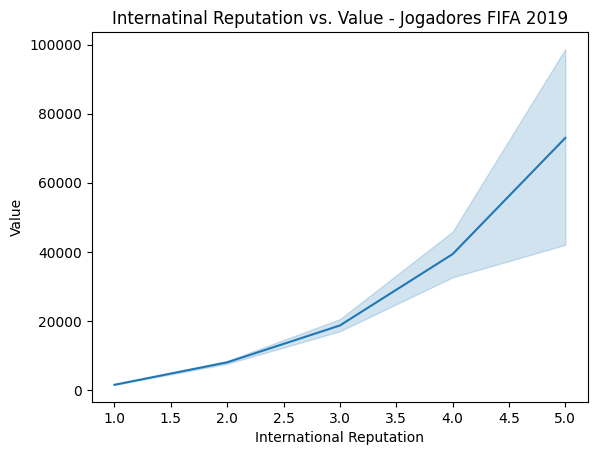

In [191]:
# Qual a influência de Internatinal Reputation sobre Value?
import seaborn as sns
sns.lineplot(x='International Reputation', y='Value', data=df)
plt.title('Internatinal Reputation vs. Value - Jogadores FIFA 2019')


Portanto, podese observar uma clara relação entre a International Reputation e Value

In [192]:
# Quasão o peso e altura médios entre os jogadores?
peso = df.Weight.mean().round(2)
altura = df.Height.mean().round(2)
print(f'Peso: {peso}, Altura = {altura}')

Peso: 165.98, Altura = 5.95


In [193]:
# Qual a idade média entre os jogadores?
print(int(df.Age.mean()), 'anos')

25 anos


In [194]:
# Qual a média do Value dos jogadores? E por clube (Club)?
media_por_clube = df.groupby('Club')[['Value']].mean().round(2)
print(f'Média geral: {df.Value.mean().round(2)}. \n Media por clube: {media_por_clube}')

Média geral: 2410.7. 
 Media por clube:                               Value
Club                               
 SSV Jahn Regensburg         796.38
1. FC Heidenheim 1846        981.79
1. FC Kaiserslautern         622.88
1. FC Köln                  4853.93
1. FC Magdeburg              789.42
...                             ...
without club/unknowed club     0.00
Çaykur Rizespor             1728.00
Örebro SK                    395.74
Östersunds FK                599.09
Śląsk Wrocław                383.80

[652 rows x 1 columns]


Text(0.5, 1.0, 'Preferred Foot among Soccer Players')

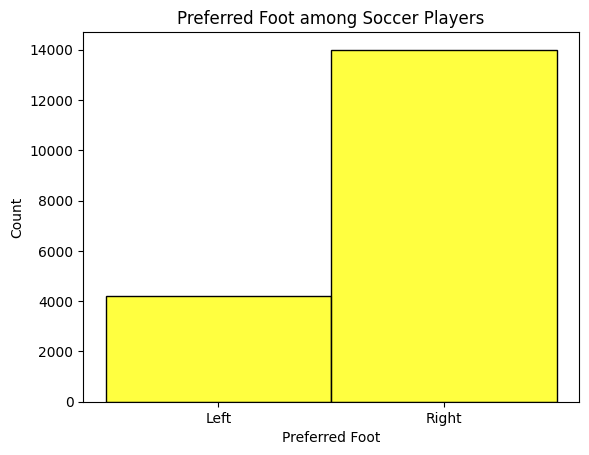

In [195]:
# Análise percentual de Preferred Foot entre os jogadores;
sns.histplot(df['Preferred Foot'], kde=False, color='Yellow')
plt.title('Preferred Foot among Soccer Players')

Text(0.5, 1.0, 'Pé preferido pelos jogares de futebol FIFA 2019')

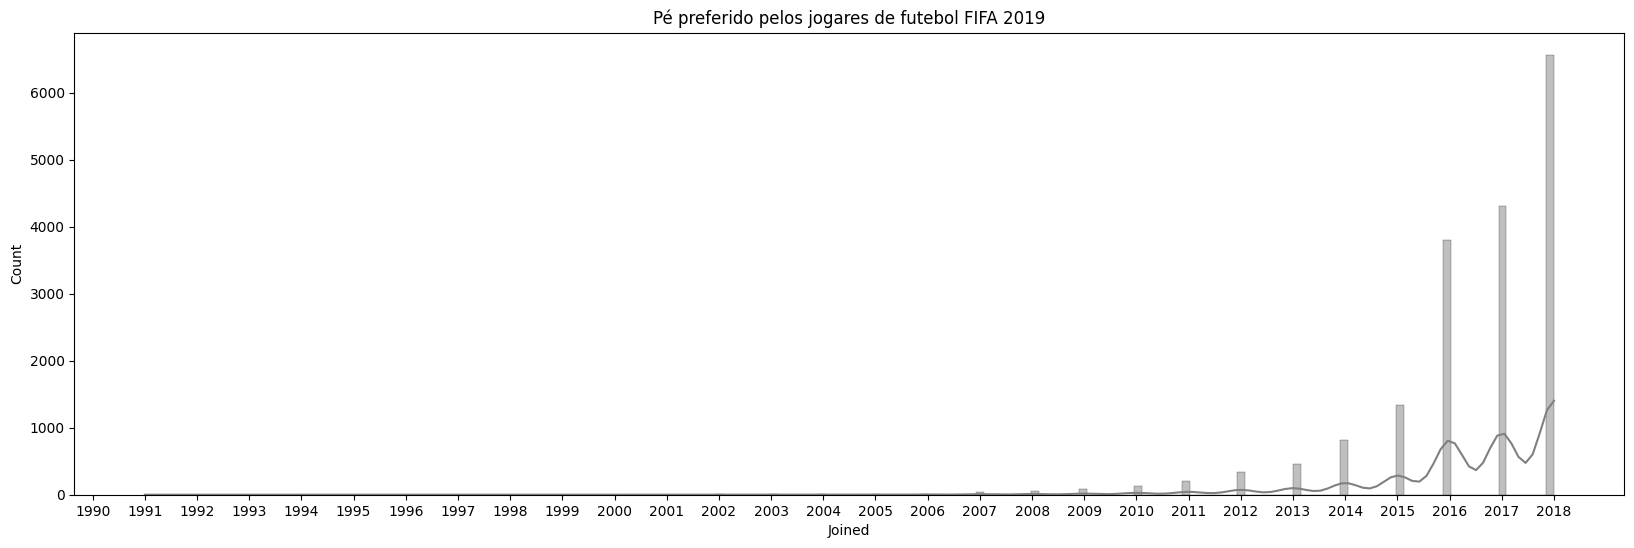

In [196]:
# Análise quantitativa de ano Joined entre os jogadores.

grafico = sns.histplot(df['Joined'], kde=True, color='Grey')
grafico.figure.set_size_inches(20, 6)
grafico.set_xticks([x for x in range(1990, 2019)])
plt.title('Pé preferido pelos jogares de futebol FIFA 2019')